In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = np.asarray(Image.open("../data/real/fighter.JPG"))

In [11]:
size = 256

sizex = size + (img.shape[1] % size) // (img.shape[1] // size)
sizey = size + (img.shape[0] % size) // (img.shape[0] // size)

(2304, 3456, 3)


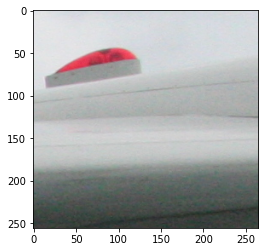

In [17]:
print(img.shape)
rows = (img.shape[0] // size) - 1 # Height
cols = (img.shape[1] // size) - 1 # Width

# Patchify
output = []
for row in range(rows):
    outputRow = []
    for col in range(cols):
        outputRow.append(img[row*sizey:row*sizey + sizey, col*sizex:col*sizex + sizex])
    outputRow.append(img[row*sizey:row*sizey + sizey, cols*sizex:img.shape[1]])
    output.append(outputRow)
# Last line
outputRow = []
for col in range(cols):
    outputRow.append(img[rows*sizey:img.shape[0], col*sizex:col*sizex + sizex])
outputRow.append(img[rows*sizey:img.shape[0], cols*sizex:img.shape[1]])
output.append(outputRow)
###
plt.imshow(output[2][10])

In [18]:
width = img.shape[1]
height = img.shape[0]

reconstructed = np.empty((height,width,3), dtype=np.uint8)

(2304, 3456, 3)


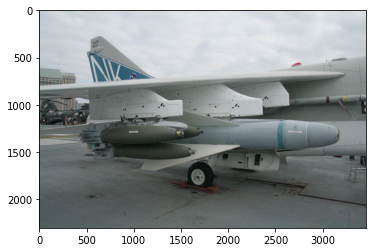

In [21]:
x = 0
y = 0
for row in output:
    for p in row:
        reconstructed[y: y + p.shape[0], x: x + p.shape[1]] = p
        x += p.shape[1]
    x = 0
    y += row[0].shape[0]
print(reconstructed.shape)
plt.imshow(reconstructed)